# Results And Analysis Of The Dynamical System Forced Current

## Algorithm

The system is

$$
    \newcommand{\qty}[1]
    {
        \left({#1}\right)
    }
    \newcommand{\qtys}[1]
    {
        \left[{#1}\right]
    }
$$     

\begin{align}
\label{eq:adimetional-diffusion-nernst}
    \frac{\partial \rho_+}{\partial \tau} &= \qty{\nabla^2 \rho_+ - \nabla\qty{\rho_+ \nabla \Psi}}, \\
    \frac{\partial \rho_-}{\partial \tau} &= \frac{\mathcal{D}_-}{\mathcal{D_+}}\qty{\nabla^2 \rho_- + \nabla\qty{\rho_- \nabla \Psi}}, \\
    \nabla^2 \Psi &= \kappa^2\qty{\rho_- - \rho_+}.
\end{align}


With boundary conditions
\begin{align}
	\label{eq:forced-current-boundary}
    J_+(x = 0) &= -\mathcal{D}_+\qty{\frac{\partial C_+}{\partial x} - C_+ \frac{z\mathcal{F}}{RT}\frac{\partial\phi}{\partial x}}\bigg|_{x= 0}= -\frac{i_0}{\mathcal{F}},\\
    J_-(x = 0) &= -\mathcal{D}_-\qty{\frac{\partial C_-}{\partial x} + C_- \frac{z\mathcal{F}}{RT}\nabla\phi} \bigg|_{x= 0} = 0,\\
\end{align}

\begin{align}
    \rho_+(\delta) = 1\\
    \rho_-(\delta) = 1\\
    \Psi(\xi = 0) &= \frac{z\mathcal{F}}{RT} V_0 = \Psi_0\\
    \frac{\partial\Psi}{\partial x}(\xi = 1) &= 0
\end{align}




# Descrete equations

For each species ($s = \pm$) we have

\begin{align}
    C_s^{n+1, k} =& C_s^{n,k} \qty{1 - 2 \alpha + s \alpha \qty{\Psi^{n, k} - \Psi^{n, k-1}}} + \alpha C_s^{n, k+1} \qty{1 - s \qty{\Psi^{n,k+1} - \Psi^{n,k}}} + \alpha C_s^{n,k-1}.\\
    \Psi^{n+1, k+1} - 2\Psi^{n+1,k} + \Psi^{n+1, k-1} =& C_+^{n+1, k} - C_-^{n+1, k}
\end{align}






### Descritizing boundary conditions

Boundary conditions are drawn from the flux and can be found to be (in descrite form)

\begin{align}
\rho_s^{n+1, 0} &= \gamma_s \rho_s^{n+1, 1} -\gamma_s \frac{i_0}{\mathcal{D}_s\kappa^2Cb\mathcal{F}}\delta_{s,+},\\
\rho_s^{n+1, M} &= 1,\\
\Psi^{n+1, 0} &= \Psi_0,\\
\Psi^{n+1, M} &= 0,\\
\Psi^{n+1, M} &= \Psi^{n+1, M-1} .
\end{align}

with

\begin{align}
\gamma_+ &= \frac{1}{1 + \qty{\Psi^{n+1, 1}-\Psi^{n+1,0}}}, \\
\gamma_- &= \frac{1}{1 - \qty{\Psi^{n+1, 1}-\Psi^{n+1,0}}}, \\
\bar{i_s} &= \frac{i_0}{\mathcal{D}_s\kappa^2Cb\mathcal{F}}\delta_{s,+}.
\end{align}

and $\delta_{s,+}$ the Kronecher delta.

This equations yield the following boundary equations

$$ k=1 $$

\begin{align}
    \rho_s^{n+1, 1} =& \rho_s^{n,1} \qty{1 - 2 \alpha_s + \alpha_s \gamma_s + s \alpha_s \qty{\Psi^{n, 1} - \Psi^{n, 0}}} - \alpha_s\bar{i}_s + \alpha_s \rho_s^{n, 2} \qty{1 - s \qty{\Psi^{n,2} - \Psi^{n,1}}},\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& \Delta \xi^2\qty{C_+^{n+1, 1} - C_-^{n+1, 1}}.
\end{align}


$$ k = m-1 $$

\begin{align}
    \rho_s^{n+1, m-1} =& \rho_s^{n,m-1} \qty{1 - 2 \alpha_s + s \alpha_s \qty{\Psi^{n, m-1} - \Psi^{n, m-2}}} + \alpha_s \rho_s^{n, m-2},\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& \Delta \xi^2 \qty{C_+^{n+1, 1} - C_-^{n+1, 1}}.  
\end{align}




### Matrix equations

We can write the system as follows

\begin{align}
\underline{\rho_s^{n+1}} = (\bf{A} + s\alpha_s\bf{B}(\Psi^{n}) ) \cdot \underline{\rho_s^{n}} + \bf{b_s}\\
\bf{D} \underline{\Psi}^{n+1} = \Delta \xi ^2\qty{\underline{\rho_-}^{n+1} - \underline{\rho_+}^{n+1}}- \underline{b}_{\Psi}
\end{align}


where

\begin{align}
A = \begin{bmatrix}
    1 - 2 \alpha + \alpha \gamma_s   &  \alpha   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    \alpha    &   1 - 2 \alpha       &  \alpha   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & \alpha               &  1 - 2 \alpha  & \alpha   & \cdots   &   0   &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  \alpha    &  1-2\alpha &    \alpha   &    0 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  \alpha    &  1-2\alpha 
\end{bmatrix}
\end{align}

,

\begin{align}
B(\Psi) = \begin{bmatrix}
    \qty{\Psi^{n,1} - \Psi^{n, 0}}   &  -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    0                                &  \qty{\Psi^{n,1} - \Psi^{n, 0}}    & -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 0                    &  \qty{\Psi^{n,2} - \Psi^{n, 1}}    & -\qty{\Psi^{n,3} - \Psi^{n, 2}} & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & \qty{\Psi^{n,M-2} - \Psi^{n, M-3}}   & -\qty{\Psi^{n,M-1} - \Psi^{n, M-2}} \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  0    &  \qty{\Psi^{n,M-1} - \Psi^{n, M-2}}
\end{bmatrix}
\end{align}

and
\begin{align}
D = \begin{bmatrix}
    -2   &  1   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    1    &  -2    & 1   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 1                    &  -2   & 1 & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & -2   & 1 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  1    &  -2
\end{bmatrix}.
\end{align}

\begin{align}
    b_\Psi = \begin{bmatrix}
        \Psi_0\\
        0\\
        \vdots\\
        0
    \end{bmatrix}
\end{align}

\begin{align}
    b_s = \begin{bmatrix}
        -\bar{i}_S\\
        0\\
        \vdots\\
        0\\
        \alpha_s1
    \end{bmatrix}
\end{align}

We define matrix $\bf{Z}$ as

\begin{align}
    Z_s = A_s + s\alpha B(\underline{\Psi})
\end{align}

In [8]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import math
from decimal import Decimal
import matplotlib
import json
with open('../ch03/code/model_parameters.json', 'r') as file:
    params = json.loads(file.read())
    

# Electric potential and Field as function of time

We plot the electric potential and electric field as a function of time.

In [22]:
class Model():
    def __init__(self, params):
        #Model Parameters
        self.Cb = params['bulkConcentration']
        self.D = params['diffusionCoefficientScale']
        self.z = params['z']
        self.F = params['Fa']
        self.R = params['R']
        self.T = params['T']
        self.V0 = params['V0']
        self.epsilon = params['epsilon']
        self.kappa =  np.sqrt(( ( self.z * self.F  ) ** 2 * self.Cb ) / ( self.epsilon * self.R * self.T ) )
        self.Psi0 = self.z * self.F * params['V0'] / ( self.R * self.T )
        self.D1 = self.D * params["D1"]
        self.D2 = self.D * params["D2"]
        self.N = 30000
        self.M = 100
        self.length = params["length"]
        self.xi = np.linspace(0,params["length"], self.M)
        self.tau = np.linspace(0,params["timespan"], self.N) #shape is N+1
        

        #Grid Parameters
        self.dtau = params["timespan"]/(self.N)  # N Partitions
        self.dxi = self.length/(self.M) # M Partitions 
        self.a1 = self.dtau / self.dxi ** 2 
        self.a2 = self.dtau / self.dxi ** 2 * self.D2/self.D1
        
        if(self.a1 > 0.5):
            print("a1 greater than 0.5:" +str(self.a1))
        if(self.a2 > 0.5):
            print("a1 greater than 0.5:" +str(self.a2))

        #Plotting parameters
        self.imageName = 'complete-diffusion-nernst'
        
    def build(self):
        M = self.M
        N = self.N
        a1 = self.a1
        a2 = self.a2
        Psi0 = self.Psi0
        kappa = self.kappa
        dxi = self.dxi
        D1 = self.D1 
        D2 = self.D2
        # Define the coefficient matrix
        g1 = 1 / ( 1 +  Psi0)  
        di1 = ( 1 - 2 * a1 ) * np.ones(M-2)
        di1[0] = ( 1 - 2 * a1 + a1 * g1 )
        A1 = diags(np.array([ a1 * np.ones(M-3), di1, a1 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        g2 = 1 / ( 1 - Psi0 )
        di2 = ( 1 - 2 * a2 ) * np.ones(M-2)
        di2[0] = ( 1 - 2 * a2 + a2 * g2 )
        A2 = diags(np.array([ a2 * np.ones(M-3), di2, a2 * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()

        B1 = np.zeros([M-2, M-2])
        B2 = np.zeros([M-2, M-2])

        D0 = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        Dinv = np.asarray(np.linalg.inv(D0))

        b1 = np.zeros(M-2)
        b1[-1] = 1
        b2 = np.zeros(M-2)
        b2[-1] = 1

        bPsi = np.zeros(M-2)
        bPsi[0] = Psi0

        def B(s, Psi, n):
            diag =  (Psi[n, 3:] - Psi[n, 2:-1])
            diag2 =  -(Psi[n, 2:-1] - Psi[n,:-3])
            PsiMatrix = diags(np.array([ diag2 , diag ]), [-1, 1], shape=(M-2, M-2)).toarray()
            PsiMatrix[0,1] = (Psi[n, 2] - 2 * Psi[n, 1] + Psi[n,0])
            if s == 1:
                return  -1 * a1 /4 * PsiMatrix
            if s == -1:
                return a2 / 4 * PsiMatrix
        # Set up initial conditions for C

        rho1 = np.zeros([N, M])
        rho2 = np.zeros([N, M])
        Psi = np.zeros([N, M])
        E = np.zeros([N, M-1])

        rho1[0, :] = 0
        rho1[0, -1] = 1    

        rho2[0, :] = 0
        rho2[0, -1] = 1  

        Psi[0, :] = 0
        Psi[0, 0] = Psi0

        
        #Starting iteration
        for n in range(0, N-1):

             # Update border condition
            #g1 = 1 / ( 1 - (Psi[n,1]- Psi0) )
            A1[0,0] = ( 1 - 2 * a1 )#+ g1 * a1 )

            #g2 = 1 / ( 1 + (Psi[n, 1] - Psi[n,0]))
            A2[0,0] = ( 1 - 2 * a2 )#+ g2 * a2 )

            rho1[n+1, 1:M-1] = np.matmul(A1, rho1[n, 1:M-1])  + a1 * b1 + np.matmul(B(1, Psi, n), rho1[n, 1:M-1])
            rho1[n+1, 0] = rho1[n+1, 2] - (Psi[n,2]- Psi0)  
            rho1[n+1, -1] = 1

            rho2[n+1, 1:M-1] = np.matmul(A2, rho2[n, 1:M-1]) + a2 * b2 + np.matmul(B(-1, Psi, n), rho2[n, 1:M-1]) 
            rho2[n+1, 0] = rho2[n+1, 2] + (Psi[n,2]- Psi0)  
            rho2[n+1, -1] = 1

            Psi[n+1, 1:M-1] = np.matmul(Dinv, dxi * (rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1]) - bPsi )
            Psi[n+1, 0] = Psi0
            Psi[n+1, -1] = 0
        

            E[n+1,0:M-1] = - self.kappa * (Psi[n+1,1:M] -  Psi[n+1,:M-1])/dxi
            
        print("Build Complete")
        self.rho1 = rho1
        self.rho2 = rho2
        self.Psi = Psi
        self.E = self.R * self.T * E / (self.z * self.F)

        
    def remove_points(self, A, n):
        #n is the number of steps to skip
        if n >= 4:
            A = np.delete(A, [1, 2, 3])

        for i in range(0,int(len(A)/4)):
            index = i+n
            A = np.delete(A, [index-2, index-1, index])
        return A
    
    #Cm is the imported analytical solution
    def plot(self, tau, f, imageName='complete-diffusion-nernst'):
        
        imageName = imageName + str(t)[-3:]
        Cb = self.Cb
        dtau = self.dtau
        C1 = Cb * self.rho1
        C2 = Cb * self.rho2
        if(f == 'E'):
            func = self.E
            ylabel = r'Electric Field $(V / m)$ $\times 10^6$'
            title = ''#'Electric Field In The Diffusion Problem With Nernst Interaction.'
        elif(f == 'phi'):
            func = self.R * self.T * self.Psi / (self.z * self.F)
            ylabel = r'Electric Potential (V)'
            title = ''#'Electric Potential In The Diffusion Problem With Nernst Interaction.'
             # this is done to avoid cluttering of numeric points over the analytic solution
        else:
            print("Unkown function. Need something real to plot")
            return -1
        
        kappa = self.kappa
        D1 = self.D1 
        mw = 4
        fs = 26
        skip = 4
        font = {'size'   : fs}
        matplotlib.rc('font', **font)
        
        xi2 = self.xi
        xi2 = xi2 / kappa * 1e9 #* nanometerScale #change the scale of the scale to nanometer

        for i in range(len(tau)):
            
            plt.figure(1)
            fig, ax2 = plt.subplots(figsize=(20,16))
            

            color = 'tab:blue'
            ax2.tick_params(axis='y', labelcolor=color)
            ax1 = ax2.twinx() 
            color = 'tab:red'
            ax1.tick_params(axis='y', labelcolor=color)

            plt.title(title, fontsize=fs, fontweight='bold')

            n = int(t[i]/dtau)
        
            ax1.plot(xi2, C1[n, :], 'g^', markersize=mw, label=r'$C_+$, $t =%.2f ns$' % Decimal(tau[i] * 1e9/ ( self.D1 * kappa ** 2 ) ))
            ax1.plot(xi2, C2[n, :],'r^', markersize=mw, label=r'$C_-$,  $t =%.2f ns$' % Decimal(tau[i] * 1e9/ ( self.D1 * kappa ** 2 ) ))
            ax1.legend(loc='upper left', fontsize = fs)
            
            if f == 'E':
                ax2.plot(xi2[0:self.M-1], 1e-6 * func[n, :], 'b^', markersize=mw, color='tab:blue', label=r'$E$,  $t =%.2f ns$' % Decimal(tau[i] * 1e9 / ( self.D1 * kappa ** 2 ) ))
            if f == 'phi':
                ax2.plot(xi2, func[n, :], 'b^', markersize=mw, color='tab:blue', label=r'$\phi$,  $t =%.2f ns$' % Decimal(tau[i] * 1e9 / ( self.D1 * kappa ** 2 ) ))

            ax1.set_xlabel(r'Distance from the interface plate (nm)', fontsize=fs)
            ax1.set_ylabel(r'Molar Concentration', fontsize=fs)
            ax2.set_ylabel(ylabel, fontsize=fs)
            ax2.tick_params(axis='y', labelcolor=color)
            

            ax2.legend(loc=(0.01,  0.85), fontsize = fs)


            ################################## Plot parameters ##################################
            textstr = '\n'.join((
                r'$V_0=%.2f V$' % Decimal(self.V0),
                #r'$i_0=%.2f A/m^2$' % Decimal(self.i0),
                r'$\kappa=%.2f nm^{-1}$' % Decimal(self.kappa /1e9),
                r'$C_b=%.2f M$' % Decimal(self.Cb),))


            props = dict(boxstyle='round', facecolor='white', alpha=0.5)
            ax1.text(0.02, 0.8, textstr, transform=ax1.transAxes, fontsize=fs, verticalalignment='top', bbox=props)

            if(len(imageName) > 0):
                plt.savefig('../../img/'+ self.imageName + f + str(i) +'.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')


            fig.tight_layout()  # otherwise the right y-label is slightly clipped

            plt.show()

    

In [23]:
params0 = params

model0 = Model(params0)

In [24]:
model0.build()

/Users/creative-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in subtract


Build Complete


<Figure size 432x288 with 0 Axes>

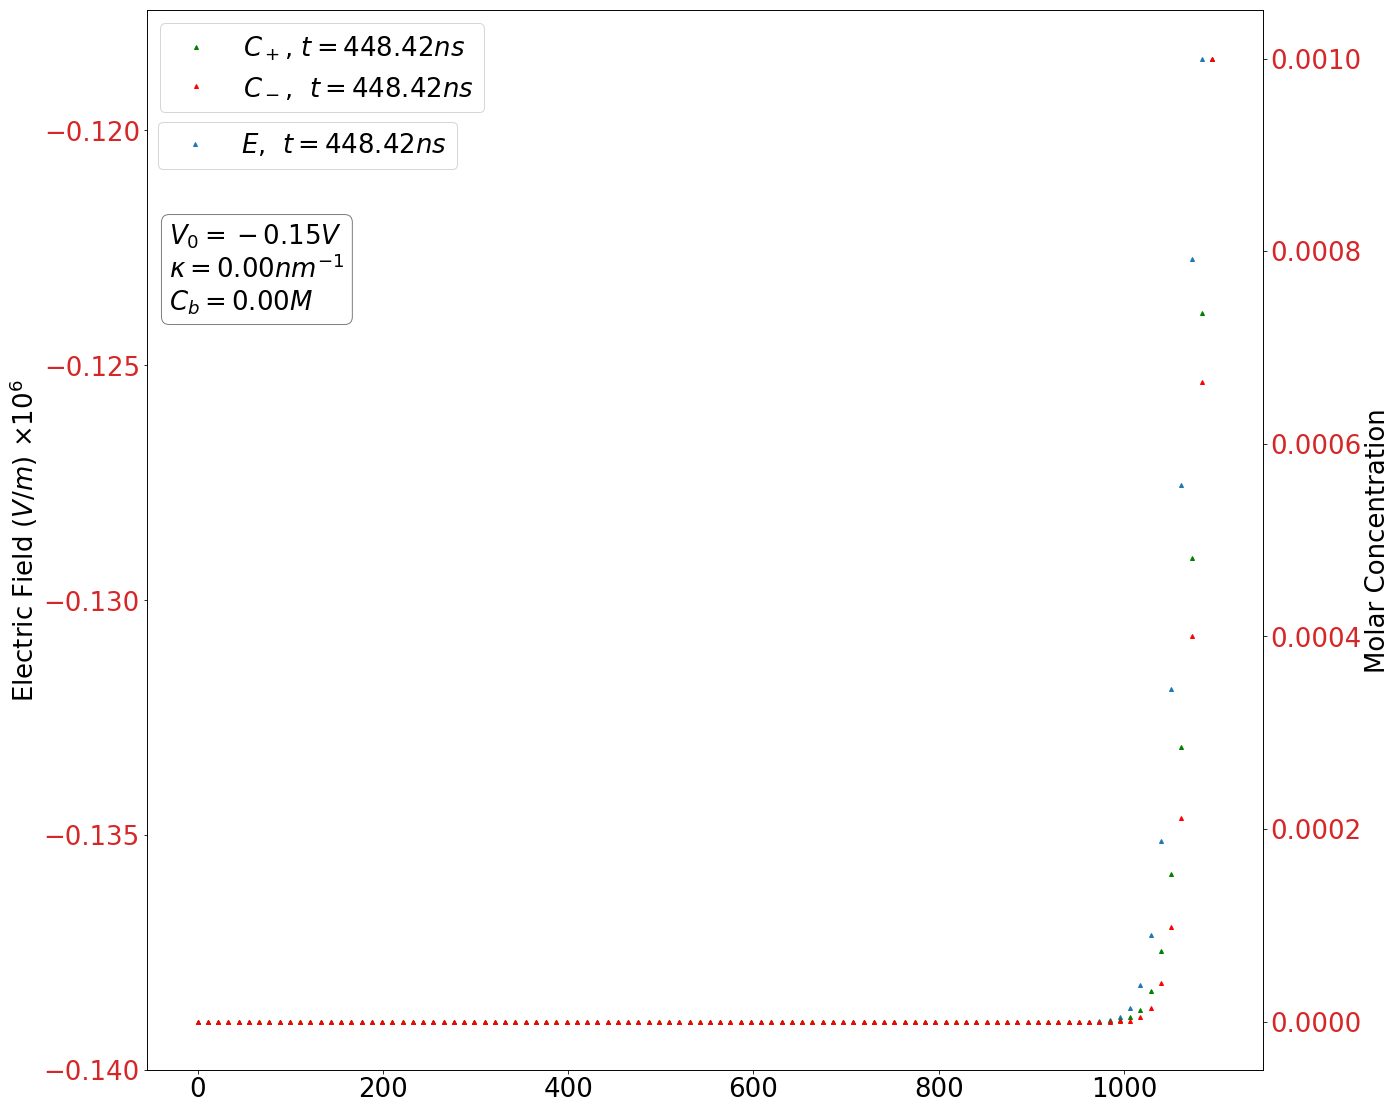

<Figure size 432x288 with 0 Axes>

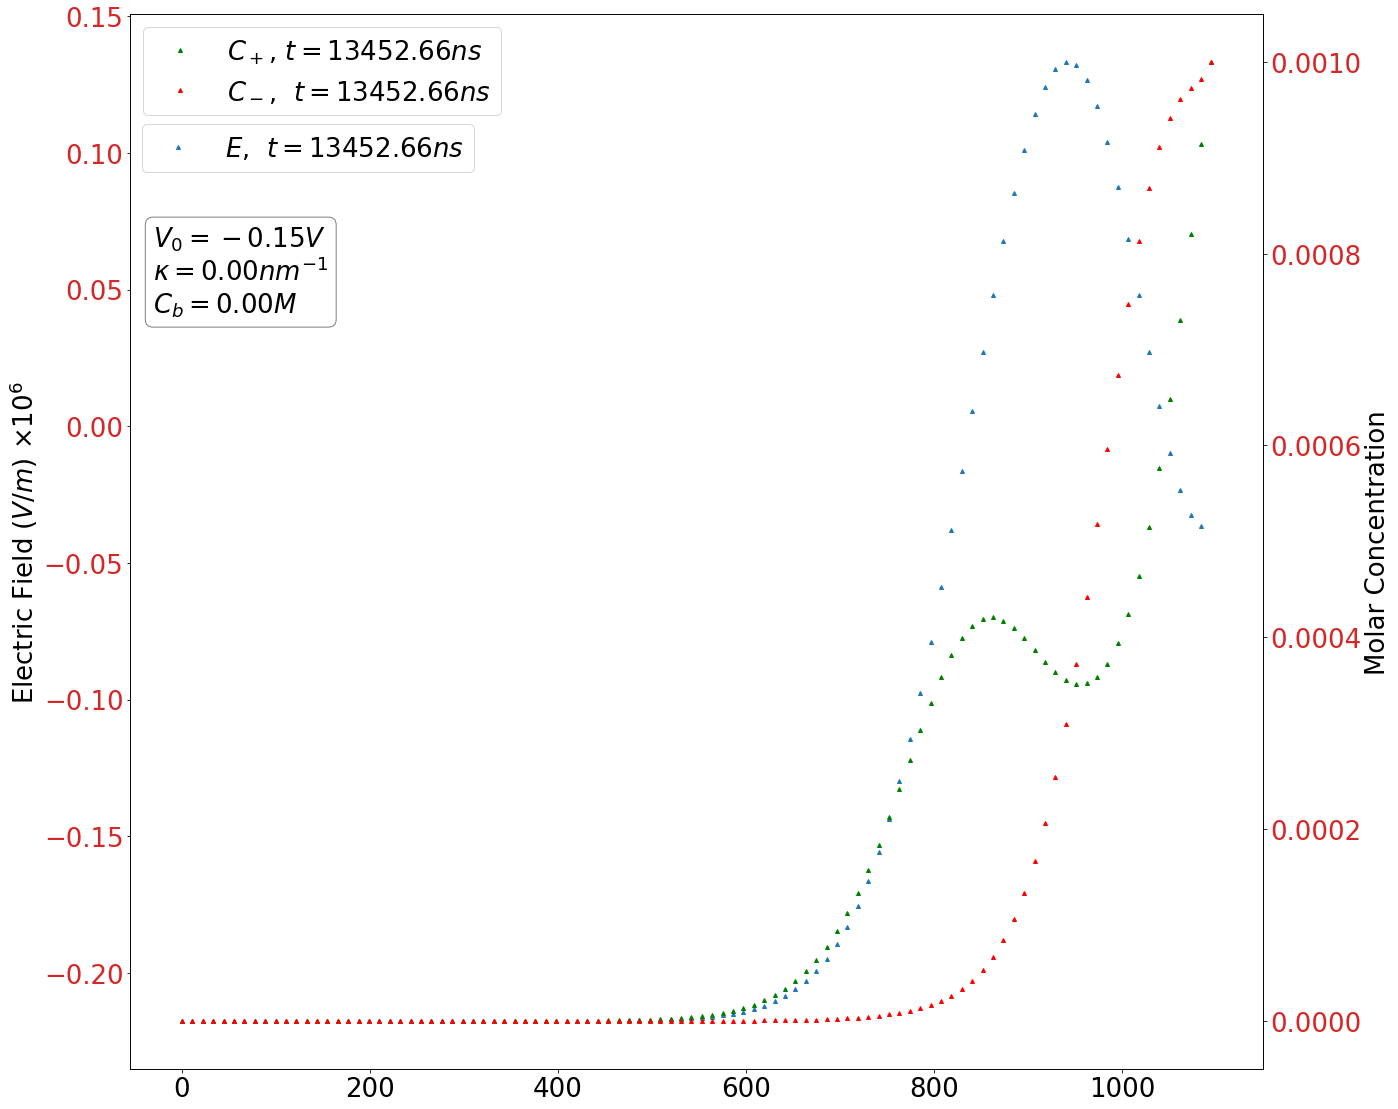

<Figure size 432x288 with 0 Axes>

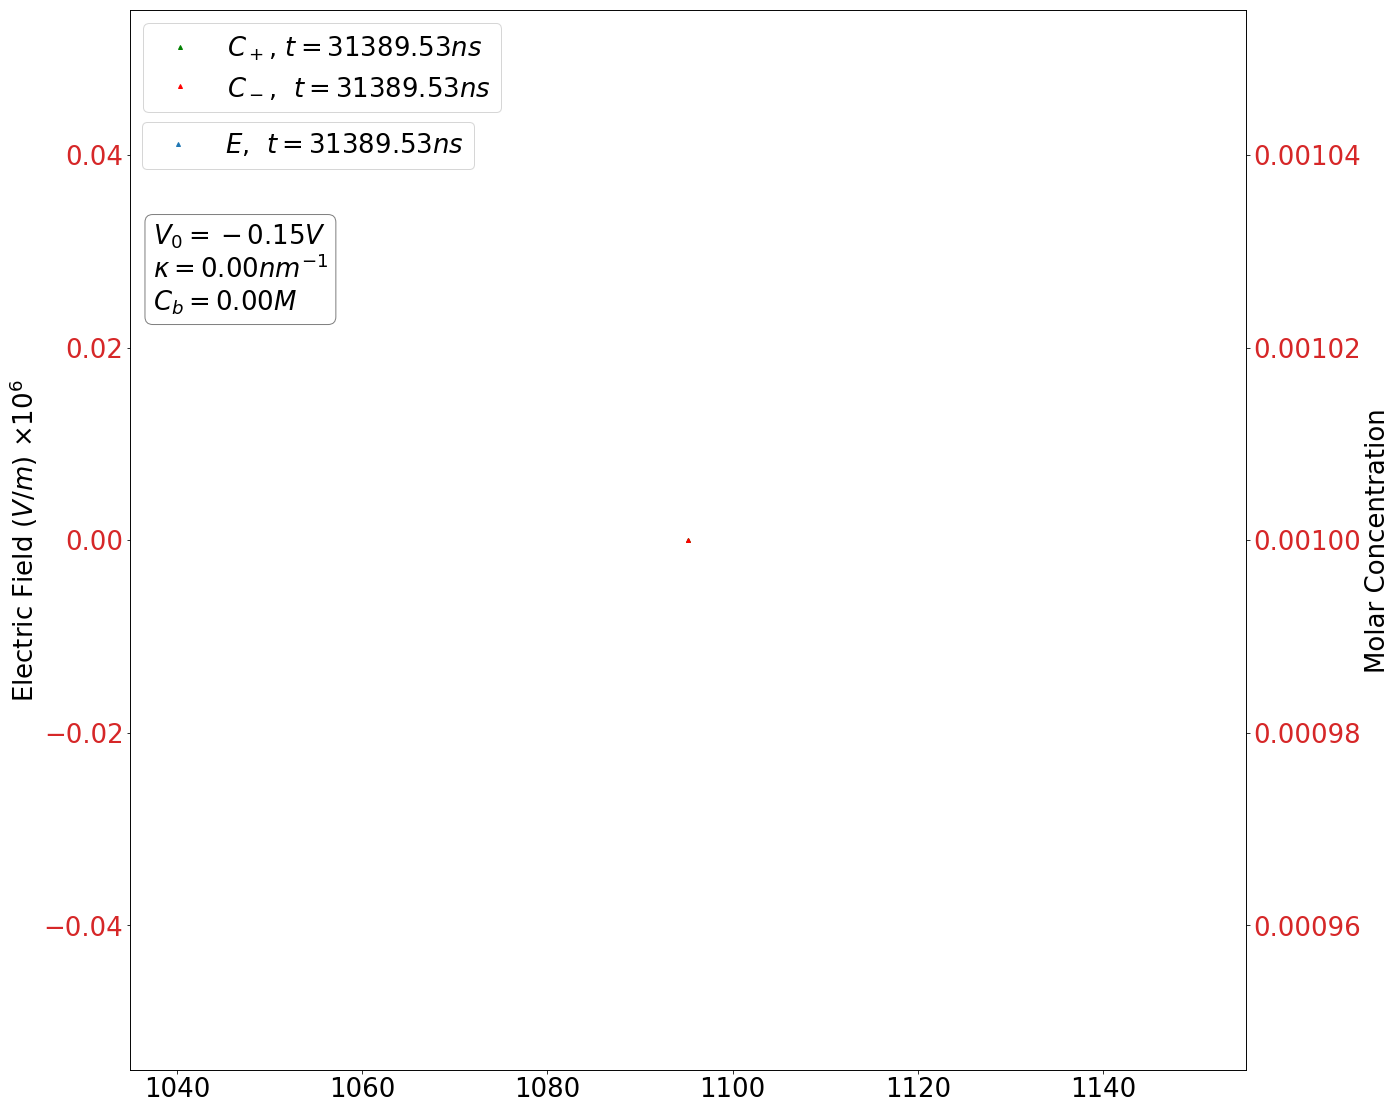

<Figure size 432x288 with 0 Axes>

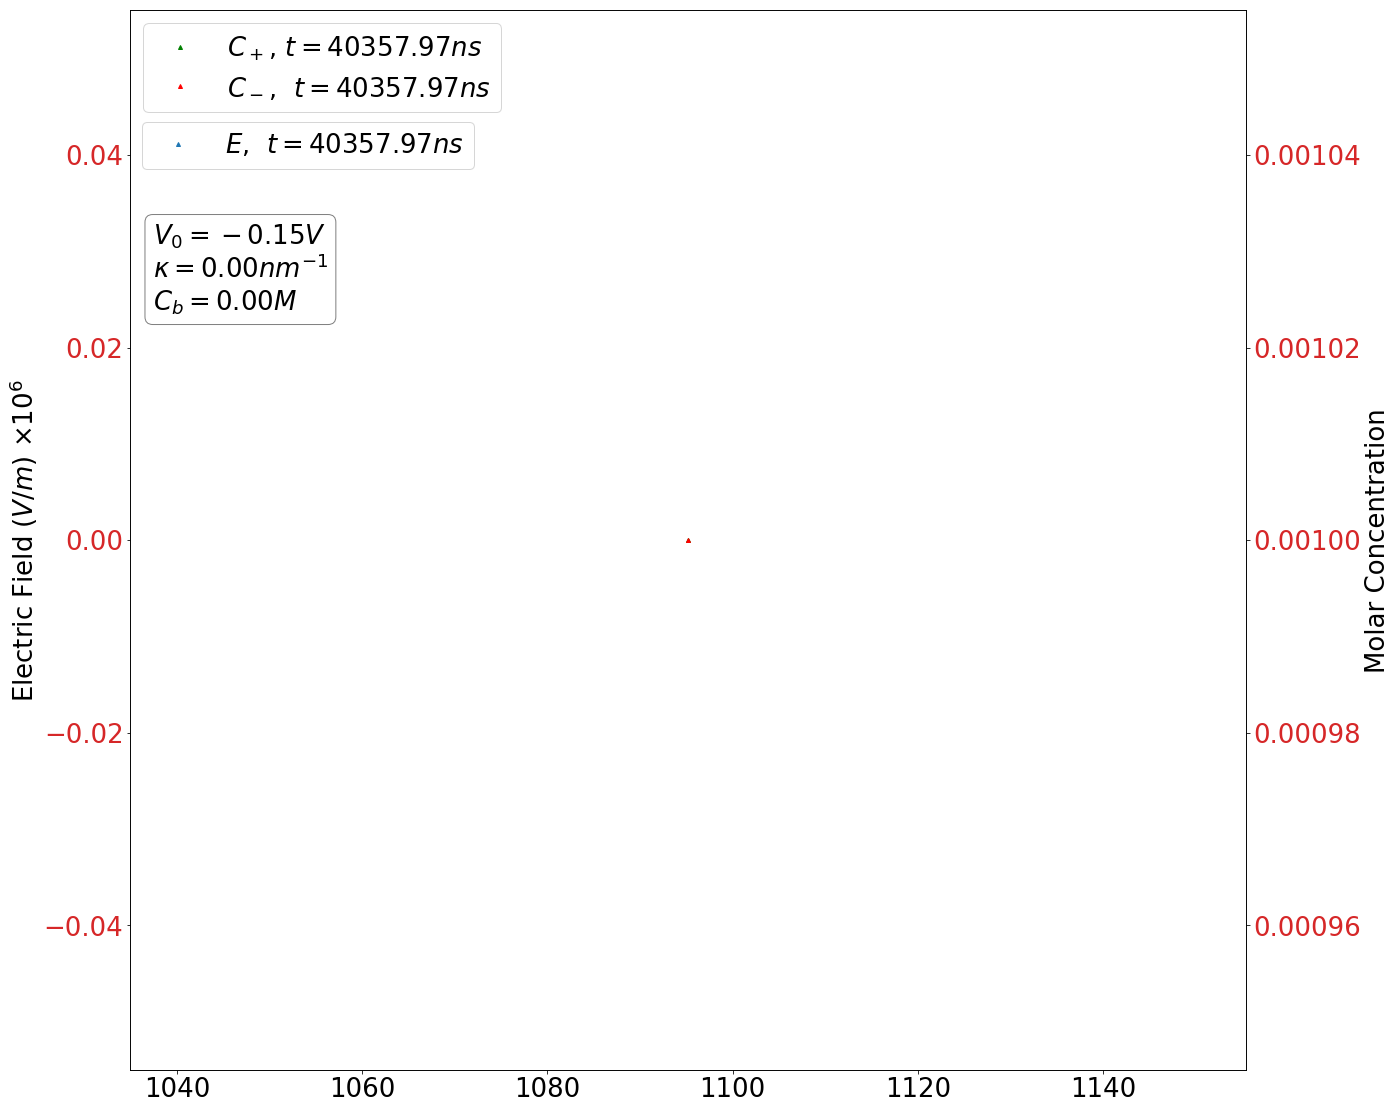

In [25]:
t = [0.01, 0.3, 0.7, 0.9]
model0.plot(t,'E')

<Figure size 432x288 with 0 Axes>

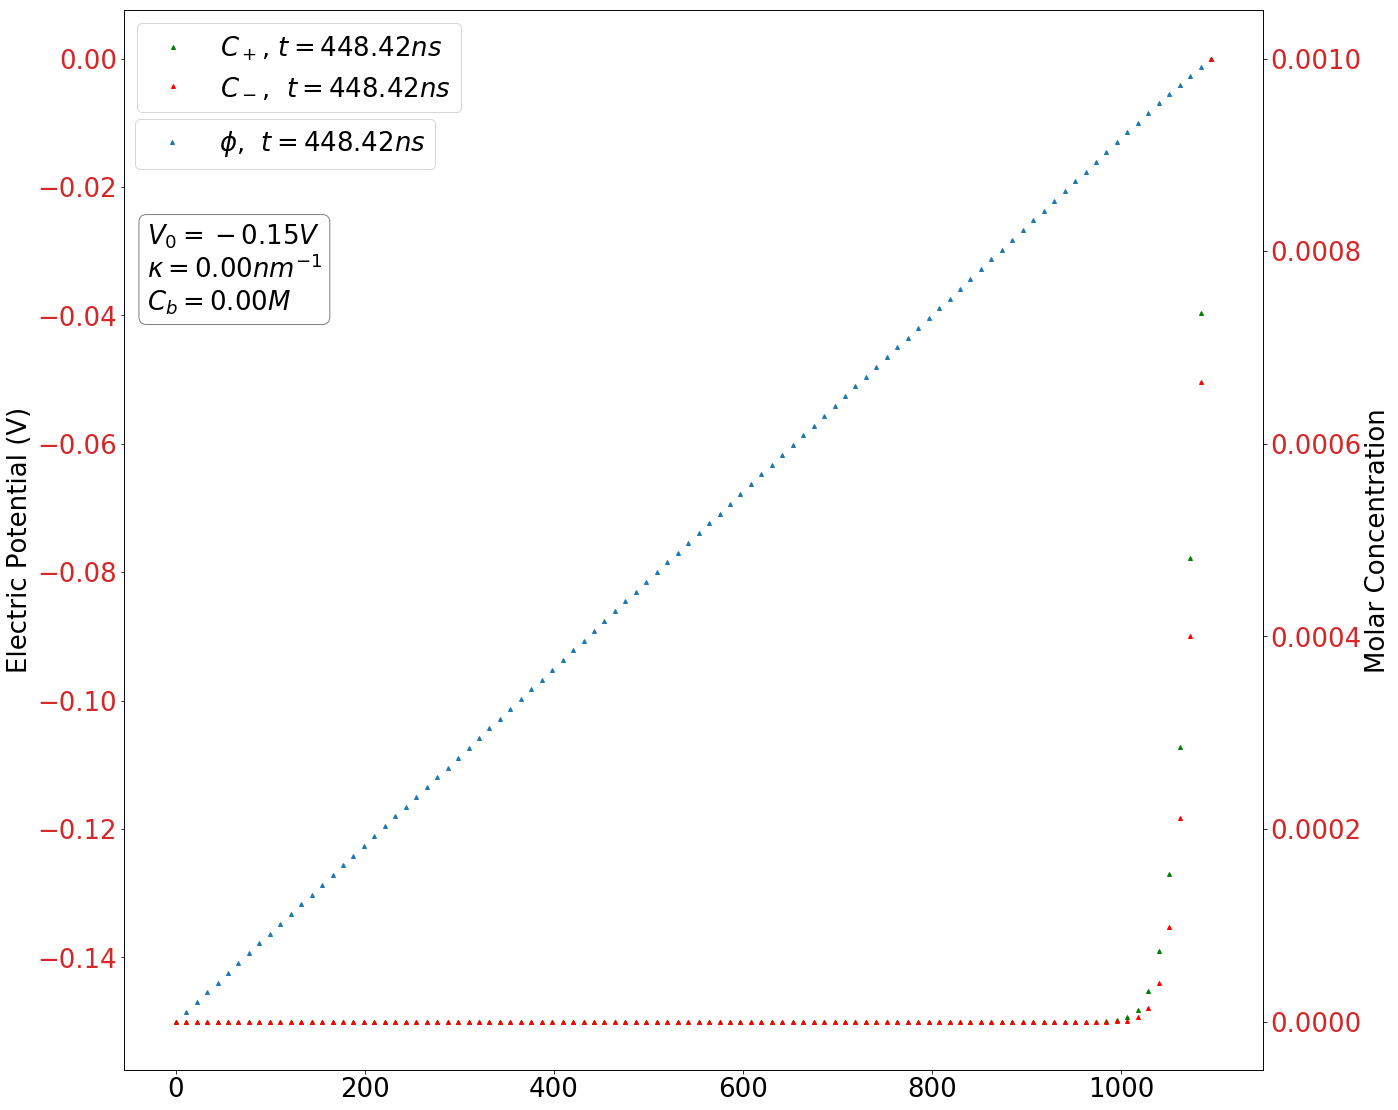

<Figure size 432x288 with 0 Axes>

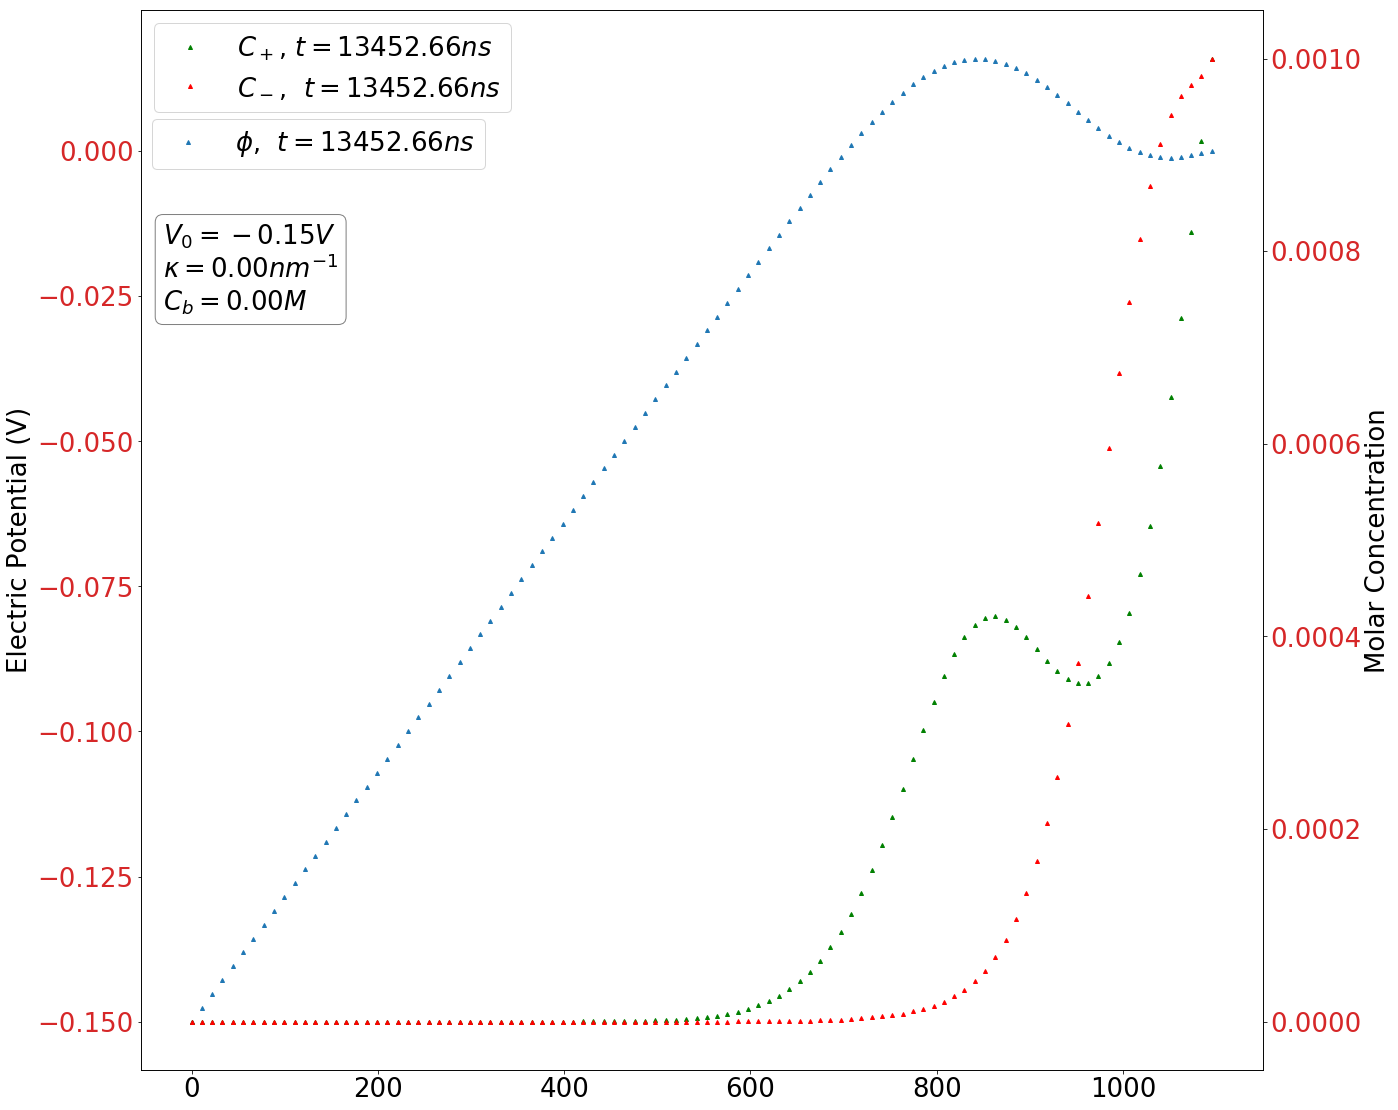

<Figure size 432x288 with 0 Axes>

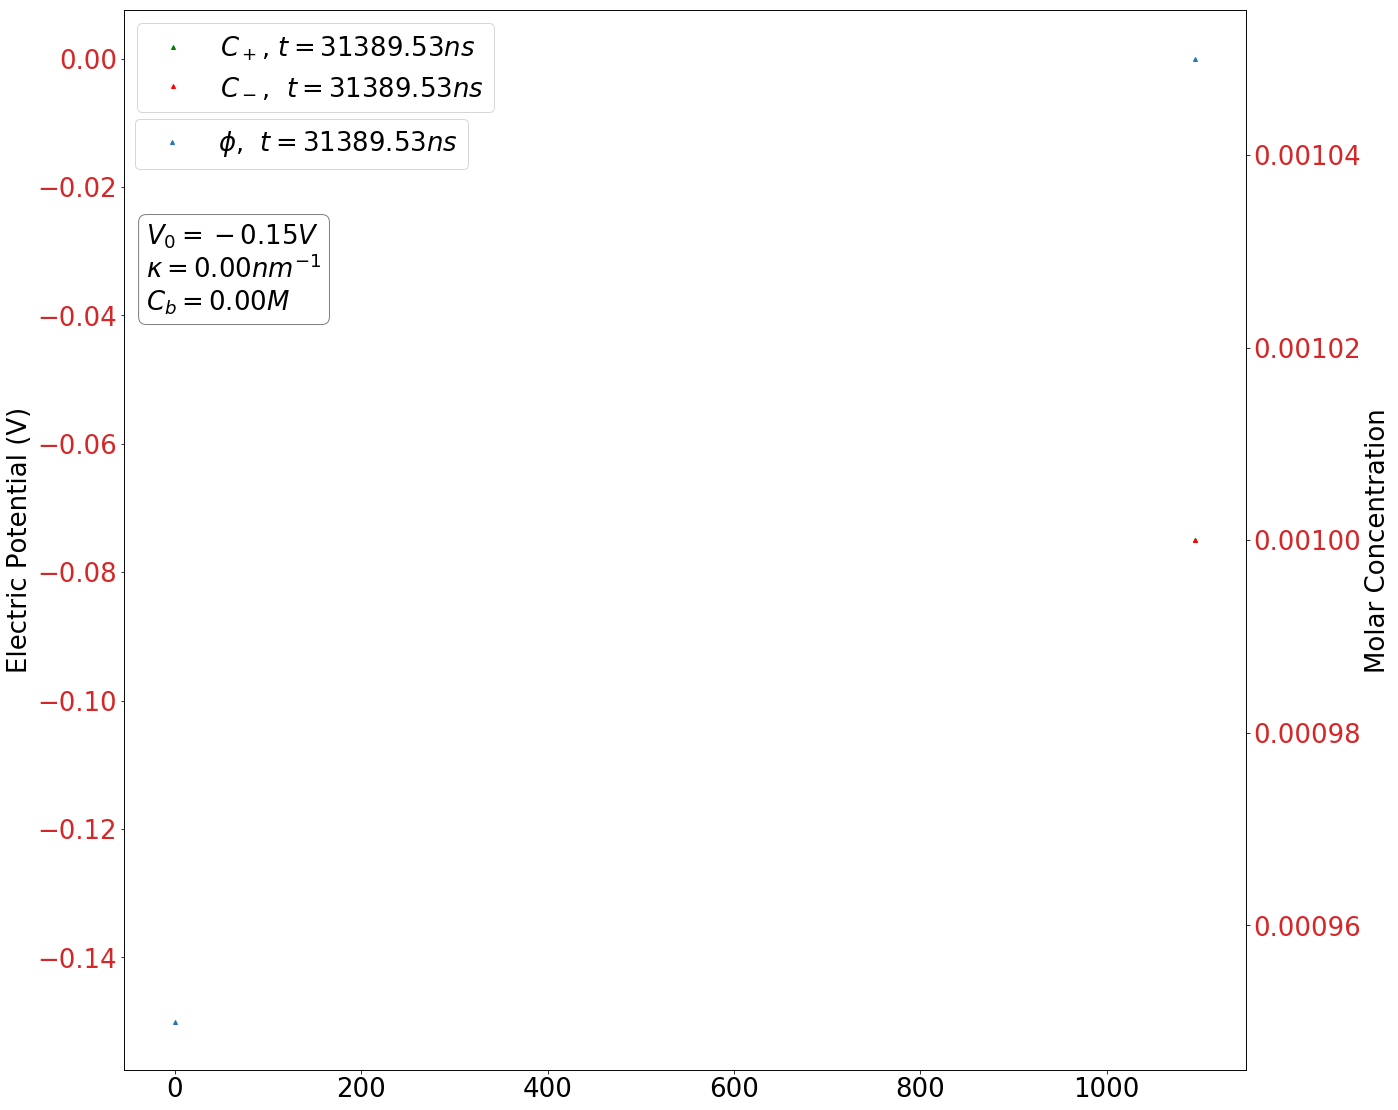

<Figure size 432x288 with 0 Axes>

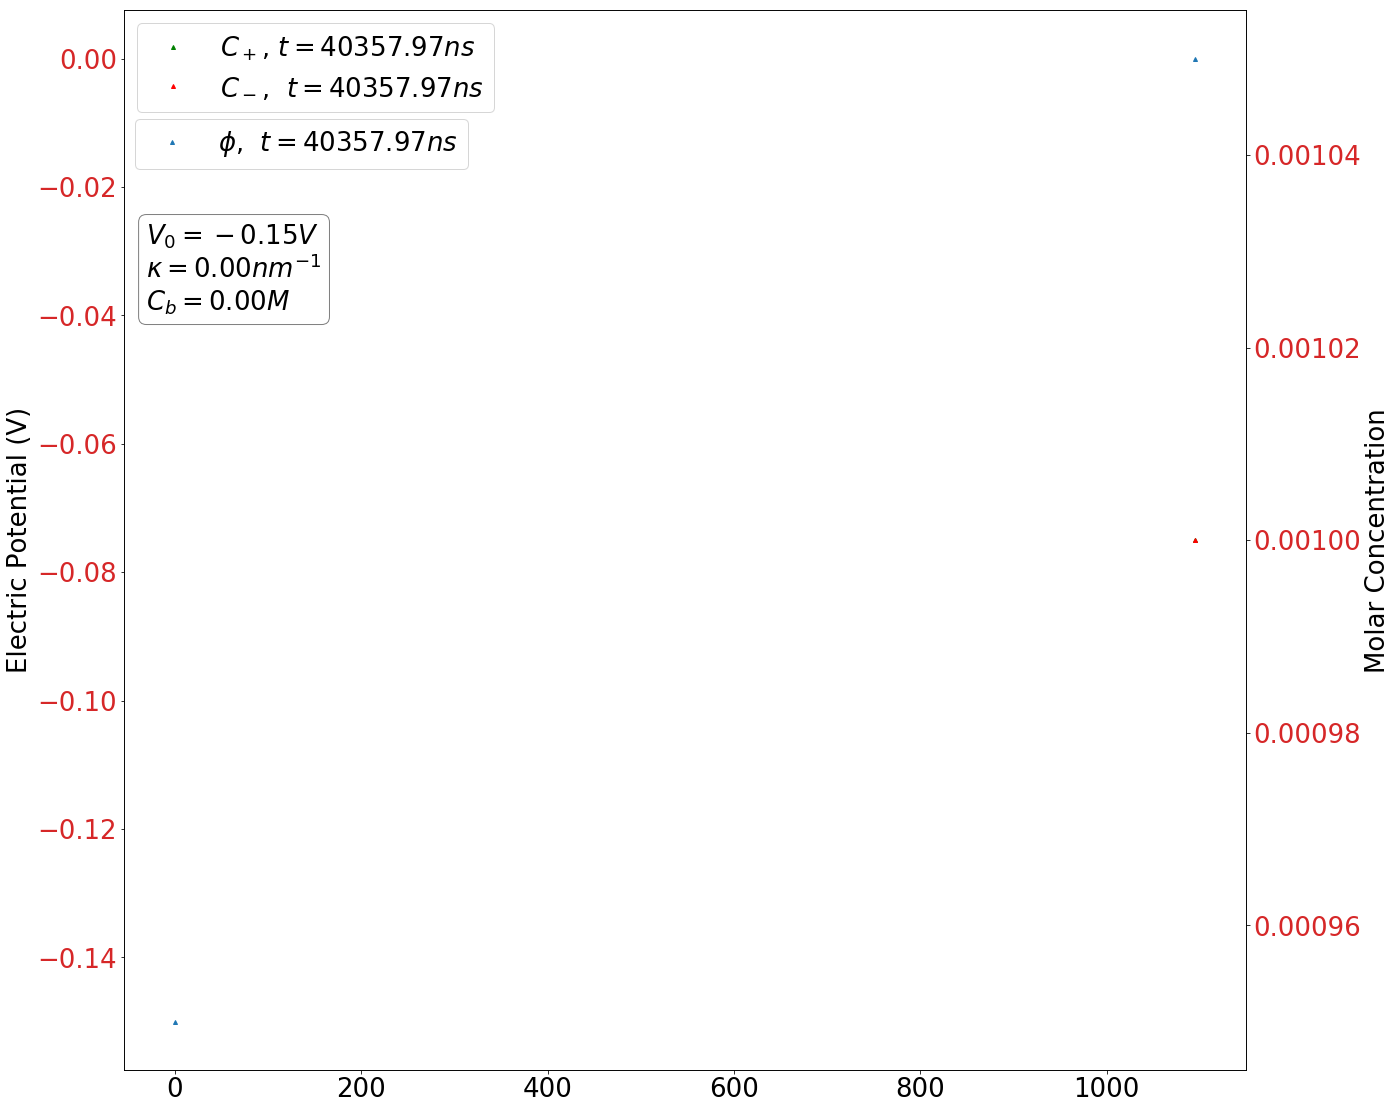

In [26]:
model0.plot(t,'phi')


## Electric field as a function of Cb





In [ ]:
#plt.figure(1)
#fig, ax2 = plt.subplots(figsize=(20,16))


#color = 'tab:blue'
#ax2.tick_params(axis='y', labelcolor=color)


#ax1 = ax2.twinx()
#color = 'tab:red'
#ax1.tick_params(axis='y', labelcolor=color)

params = { 
    'bulkConcentration': 1, 
    'diffusionCoefficientScale': 1e-9, 
    'current': 150,
    "z": 2,
    "e": 1.60217662E-19,
    "kb": 1.38064852E-23,
    "T": 300,
    "Na": 6.02E23,
    "Fa": 96485.3329, #Na * e
    "R": 8.314472,
    "V0": -0.15,
    "timespan": 10,
    "D1": 1.07,
    "D2":  0.733,
    "epsilon": 80.9 * 8.85418782E-12,
    "length": 10.0
}


dxi = params["length"] / 100
kappa =  np.sqrt(( ( params["z"] * params["Fa"]  ) ** 2 * params["bulkConcentration"] ) / ( params["epsilon"] * params["R"] * params["T"] ) )
dPsi = (params["R"] * params["T"] * kappa / params["z"] * params["Fa"])**(-1) * model0.E[:,0]
I = params["current"] * dxi / ( params["Fa"] * params["D1"] * params["diffusionCoefficientScale"] * kappa * params["bulkConcentration"] )
#plt.plot(1/(dPsi - np.ones(len(model0.rho1[:,0]))))
#plt.plot(1e9 * dPsi)
#plt.plot(model0.rho1[:,0] - I * np.ones(len(model0.rho1[:,0])))
#plt.ylim(-2,2)
plt.title('c-')
plt.plot(model0.rho2[:,0])

plt.show()


In [ ]:
plt.title('c+')
plt.ylim(-0.6,0.5)
plt.plot(model0.rho1[:,0])


In [ ]:
plt.title('E')
plt.plot(model0.E[:,0])

In [ ]:
plt.title('Psi')
plt.plot(model0.Psi[:,0])

In [ ]:
t = [0.1, 5, 9.9]

In [ ]:
numPoints = 5
Cb = np.linspace(0,10, numPoints)
surfE_C = []
aux1 = []
aux2 = []
aux3 = []
t = [0.1, 5, 9.9]

for i in range(len(Cb)):
    C = i
    params1 = { 
        'bulkConcentration': C, 
        'diffusionCoefficientScale': 1e-9, 
        'current': 200, 
        'reactionRate': 2e2,
        "z": 2,
        "e": 1.60217662E-19,
        "kb": 1.38064852E-23,
        "T": 300,
        "Na": 6.02E23,
        "Fa": 96485.3329, #Na * e
        "R": 8.314472,
        "V0": 0,
        "timespan": 10,
        "D1": 1.07,
        "D2":  0.733,
        "epsilon": 80.9 * 8.85418782E-12,
        "length": 20.0
    }
    model3 = Model(params1)
    model3.build()
 
    n = int(t[0]/model3.dtau)
    aux1.append(model3.E[n,0])
    n = int(t[1]/model3.dtau)
    aux2.append(model3.E[n,0])
    n = int(t[2]/model3.dtau)
    aux3.append(model3.E[n,0])
    
surfE_C.append([aux1, aux2, aux3])

surfE_C =np.array(surfE_C)/1e6


In [ ]:
surfE_v = []
aux1 = []
aux2 = []
aux3 = []
v = np.linspace(-1.5, 0, numPoints)
t = [1, 1, 1]
for i in range(0,len(v)):
    V0 = v[i]
    params1 = { 
        'bulkConcentration': 100, 
        'diffusionCoefficientScale': 1e-9, 
        'current': 2e2, 
        'reactionRate': 1e1,
        "z": 2,
        "e": 1.60217662E-19,
        "kb": 1.38064852E-23,
        "T": 300,
        "Na": 6.02E23,
        "Fa": 96485.3329, #Na * e
        "R": 8.314472,
        "V0": V0,
        "timespan": 10,
        "D1": 1.07,
        "D2":  0.733,
        "epsilon": 80.9 * 8.85418782E-12,
        "length": 20.0
    }
    model4 = Model(params1)
    model4.build()
    n = int(t[0]/model4.dtau)
    aux1.append(model4.E[n,0])
    n = int(t[1]/model4.dtau)
    aux2.append(model4.E[n,0])
    n = int(t[2]/model4.dtau)
    aux3.append(model4.E[n,0])
    
surfE_v.append([aux1, aux2, aux3])


In [ ]:
fig, ax1 = plt.subplots(figsize=(20,16))

mw = 4
fs = 26
skip = 4
#plt.title('Surface Electric Field As A Function Of Concentration', fontsize=fs, fontweight='bold')
plt.legend(loc='upper left', fontsize = fs-4)
for i in range(len(t)):

    plt.plot(Cb, surfE_C[0][i], '--', label=r'$E_s$,  $t =%.2f ns$' % Decimal(t[i] * 1e9/ ( model4.D1 * model4.kappa ** 2 ) ))
    
plt.xlabel(r'Molar Concentration', fontsize=fs+5)
plt.ylabel(r'Surface Electric Field (Vm)', fontsize=fs+5)
textstr = '\n'.join((
                r'$i_0=%.2f m/s$' % Decimal(model3.i0),
                r'$\kappa=%.2f m^{-1}$' % Decimal(model3.kappa),
                r'$C_b=%.2f M$' % Decimal(model3.Cb),))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.73, 0.9, textstr, transform=ax1.transAxes, fontsize=fs, verticalalignment='top', bbox=props)
plt.legend(loc='upper right', fontsize = fs)
plt.xticks(size = fs)
plt.yticks(size = fs)
plt.savefig('../../img/surfaceEfield_Cb_forced.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
#plt.show()

In [ ]:
plt.figure(figsize=(20,16))
mw = 4
fs = 26
skip = 4
#plt.title('Surface Electric Field As A Function Of V', fontsize=fs, fontweight='bold')
plt.legend(loc='upper left', fontsize = fs-4)
plt.xticks(size = fs)
plt.yticks(size = fs)
for i in range(len(t)):
    n = int(t[i]/model3.dtau)
    plt.plot(v, surfE_v[0][i], label=r'$E_s$,  $t =%.2f ns$' % Decimal(t[i] * 1e9/ ( model4.D1 * model4.kappa ** 2 ) ))
plt.xlabel(r'Surface Voltage (V)', fontsize=fs+5)
plt.ylabel(r'Surface Electric Field $(V/m)$', fontsize=fs+5)
textstr = '\n'.join((
                r'$i_0=%.2f$' % Decimal(model4.i0),
                r'$\kappa=%.2f m^{-1}$' % Decimal(model4.kappa),
                r'$V_0=%.2f M$' % Decimal(model4.V0),))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.65, 0.1, textstr, transform=ax1.transAxes, fontsize=fs-4, verticalalignment='top', bbox=props)

plt.legend(loc='lower right', fontsize = fs-4)
plt.savefig('../../img/surfaceEfield_v_forced.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()

# Electric Field Fluctuations

We define the electric field fluctuations as

\begin{align}
\delta E(t) = \qty{E(t, x=0) - E_{SS}(x=0)}
\end{align}

In [ ]:
C = [0.01, 0.3, 0.78, 1.2]
deltaE = []
timewindows = []
#new time span is an array which contains the wanted time span in ns 
#(in this case 50 ns) and then transforms it to adimensional units via
# the factor D * kappa. This must be calculated first and the come back
#to this part of the code to reinsert the kappas.
new_time_span = 50 * 1e-9 * np.array([1/(2.0382813587050528 * 1e-10), 1/(2.9894793261007435* 1e-10),1/(4.484218989151115 * 1e-10)])
#new_time_span = 50 * 1e-9 * np.array([1/(4.484218989151115 * 1e-10), 2/(3 * 2.9894793261007435* 1e-10), 1/ (2.2 * 2.0382813587050528 * 1e-10)])
for i in range(len(C)):
    params2 = { 
        'bulkConcentration': C[i], 
        'diffusionCoefficientScale': 1e-9, 
        'current': 150, 
        'reactionRate': 1e1,
        "z": 2,
        "e": 1.60217662E-19,
        "kb": 1.38064852E-23,
        "T": 300,
        "Na": 6.02E23,
        "Fa": 96485.3329, #Na * e
        "R": 8.314472,
        "V0": -0.15,
        "timespan": 1 ,
        "D1": 1.07,
        "D2":  0.733,
        "epsilon": 80.9 * 8.85418782E-12,
        "length": 20.0
    }
    
    kappa = np.sqrt(( params2["z"] * params2["Fa"] ) ** 2 * params2["bulkConcentration"] / ( params2["epsilon"] * params2["T"] * params2["R"] ))
    params2["timespan"] = ( params2["D1"] * params2["diffusionCoefficientScale"] * kappa ** 2 ) * 50 * 1e-9

    model5 = Model(params2)
    model5.build()
    timewindows.append( params2["timespan"] / ( model5.D1 * params2["diffusionCoefficientScale"] * model5.kappa ** 2 ) )
    deltaE.append(model5.E[:] - model5.E[-1])# * np.zeros(len(model5.E[1:,0])))


deltaE = np.array(deltaE)/1e6


In [ ]:
t = []
for i in range(len(C)):
     t.append(np.linspace(0, timewindows[i], len(deltaE[0])))



In [ ]:
plt.figure(figsize=(20,16))
mw = 4
fs = 26
skip = 4

#plt.title('Surface Electric Field As A Function Of V', fontsize=fs, fontweight='bold')
plt.legend(loc='upper left', fontsize = fs-4)
plt.xticks(size = fs)
plt.yticks(size = fs)

for i in range(len(C)):
    plt.plot(t[i][1:], deltaE[i][1:,0], '-', label=r'$E_s$,  $C_b ='+str(C[i])+'M$')
    
plt.xlabel(r'Time (ns)', fontsize=fs+5)
plt.ylabel(r'Electric Field Fluctuations (V/m) $\times 10^6$', fontsize=fs+5)
plt.title(r'Electric Field Fluctuations at the electrode $\delta E$')
#textstr = '\n'.join((
#                r'$k_f=%.2f$' % Decimal(model4.kf),
#                r'$\kappa=%.2f m^{-1}$' % Decimal(model4.kappa),
#                r'$V_0=%.2f M$' % Decimal(model4.V0),))

#props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#plt.text(0.65, 0.1, textstr, transform=ax1.transAxes, fontsize=fs-4, verticalalignment='top', bbox=props)

plt.legend(loc='upper right', fontsize = fs-4)
plt.savefig('../../img/surfaceDeltaE_forced.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import plot, iplot

mw = 4
fs = 26
skip = 4


#for i in range(len(C)):
#    plt.plot(t[i][1:], deltaE[i][1:,0], '-', label=r'$E_s$,  $C_b ='+str(C[i])+'M$')


trace1 = go.Scatter(
                    x = t[i][1:],
                    y = deltaE[i][1:,0],
                    mode = "lines",
                    name = "citations",
                    #marker = dict(color = '')
                    text = ' ' 
)

layout = dict(title = r'Electric Field Fluctuations at the electrode $\delta E$', xaxis = dict(title = 'nm', ticklen = 5), zeroline = False)

fig = dict(data = trace1, layout = layout)
iplot(fig)

#plt.xlabel(r'Time (ns)', fontsize=fs+5)
#plt.ylabel(r'Electric Field Fluctuations (V/m) $\times 10^6$', fontsize=fs+5)
#plt.title(r'Electric Field Fluctuations at the electrode $\delta E$')
#textstr = '\n'.join((
#                r'$k_f=%.2f$' % Decimal(model4.kf),
#                r'$\kappa=%.2f m^{-1}$' % Decimal(model4.kappa),
#                r'$V_0=%.2f M$' % Decimal(model4.V0),))

#props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#plt.text(0.65, 0.1, textstr, transform=ax1.transAxes, fontsize=fs-4, verticalalignment='top', bbox=props)

#plt.legend(loc='upper right', fontsize = fs-4)
#plt.savefig('../../img/surfaceDeltaE.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
#plt.show()